<a href="https://colab.research.google.com/github/Leena-GO/Self-study/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%2B_%EB%94%A5%EB%9F%AC%EB%8B%9D_03__k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#03-2 선형회귀


## 1. k-최근접 이웃의 한계

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [4]:
#훈련세트와 테스트 세트를 2차원 배열로 변환
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [6]:
#모델을 사용하여 길이가 50cm인 농어 무게 예측하기
print(knr.predict([[50]]))

[1033.33333333]


- 50cm, 1.5kg인 농어의 무게를, 1.03kg로 예측한 점이 이상하다!

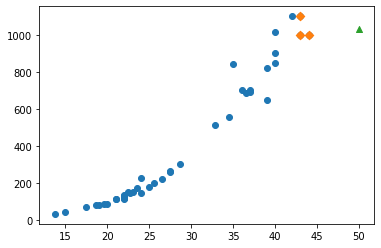

In [7]:
#산점도로 확인해보기
import matplotlib.pyplot as plt

#길이가 50cm인 농어의 이웃 구하기
distance, indexes = knr.kneighbors([[50]]) #kneighbors()메서드를 사용하면, 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 얻을 수 있다.

#훈련세트의 산점도
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 작성
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

#길이가 50cm였던 농어의 결과|
plt.scatter(50, 1033, marker = '^')

plt.show()

In [8]:
distance #아마 x축 거리?

array([[6., 7., 7.]])

In [9]:
indexes

array([[34,  8, 14]])

- 길이가 커질수록 농어의 무게가 증가하는 경향이 있다.
- 50cm의 농어의 근접된 값은 45cm 근방의 값이기 때문에, 이 샘플들의 무게를 평균하게 된다.
- 45cm 샘플타깃의 평균을 구해보자

In [10]:
print(np.mean(train_target[indexes]))
print(knr.predict([[100]])) #100cm의 농어 무게를 예측할 때도 마찬가지이다.

1033.3333333333333
[1033.33333333]


- 새로운 샘플이 훈련 세트의 범위를 벗어나면, 엉뚱한 값을 예측할 수 있다는 단점이 있다.
- 100cm 농어 무게 예측 산점도도 그려보자.

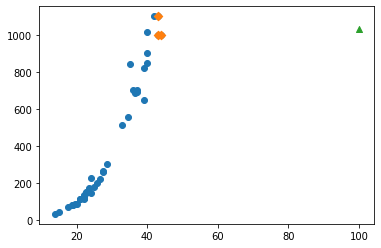

In [11]:
distance, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(100, 1033, marker = '^')
plt.show()

- 이렇게 되어버리면, 길이가 아무리 늘어나도 무게는 그대로 유지가 되게 된다!

In [12]:
distance

array([[56., 57., 57.]])

In [13]:
indexes

array([[34,  8, 14]])

In [14]:
train_input[indexes]

array([[[44.],
        [43.],
        [43.]]])

- 머신러닝 모델은 주기적으로 훈련을 해줘야 한다.
- 시간과 환경이 변하면서 데이터도 바뀌기 때문이다.
- 새로운 데이터를 사용하여 반복적으로 훈련해주어야 한다.

## 2. 선형 회귀(Linear Regression)
- **선형회귀**:특성과 타깃 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾는다. 특성이 하나인 경우, 어떤 직선을 학습하는 알고리즘이다.
- 특성을 가장 잘 나타낼 수 있는 직선을 찾는 것이 포인트.
- 선형 회귀가 찾은 특성과 타깃 사이의 관계는 선형 방정식의 **계수** 또는 **가중치**에 저장된다.
- **모델 파라미터**는 선형 회귀가 찾은 가중치처럼 머신러닝 모델이 특성에서 학습한 파라미터를 말한다.
- 이 직선을 **LinearRegression** 알고리즘이 자동으로 찾아준다!

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#선형 회귀 모델 훈련
lr.fit(train_input, train_target)

#50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


- 앞전 *k-최근접 이웃 모델*을 사용했을 때에 비해 무게가 늘어남을 볼 수 있다.



---------------
- 이 선형 회귀가 학습한 직선을 그려보고 어떻게 이런 값이 나왔는지 알아보자.

In [16]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


- **coef_**: '계수(coefficient)' 혹은 '가중치(weight)'라고 한다.
- **intercept_**: y절편 값
-------
- 농어의 길이 15에서 50까지 직선으로 그려보자.
- 위에서 구한 기울기와 절편을 사용하여 두 점을 이으면 된다.
- 훈련 세트의 산점도를 함께 그려보자.

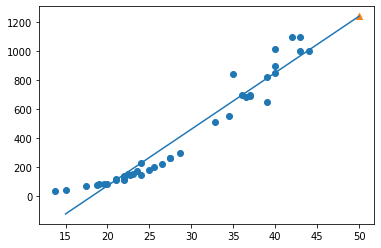

In [17]:
#직선방정식 y = 39x-709
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_]) #plot: 선 그리기

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker = '^') #앞단에 예측했던 농어 무게
plt.show()

- 위에 나타난 식은, 선형 회귀 알고리즘이 데이터셋에서 찾은 최적의 선이다.
- 길이가 50cm인 농어에 대한 예측은 이 직선의 연장선에 있다!
----------
- 다음으로, 훈련 세트와 테스트 세트의 R²점수를 확인해보자.

In [18]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


- 훈련 세트와 테스트 세트의 점수가 차이남을 볼 수 있다.
- 전체적으로 점수가 낮다. (**과소적합** 문제)
- 그래프 좌측을 보면, 최적선과 데이터 간에 차이가 있음을 볼 수 있다.
  (또한 무게가 0 이하가 될 수 없다!)

## 3. 다항회귀(Polynomial Regression)
- **다항회귀**: 다항식을 사용한 특성과 타깃 사이의 관계를 나타낸다. 이 함수는 *비선형*일 수 있으나, *여전히 선형회귀*로 표현할 수 있다.


---




- 다음으로, 최적의 곡선을 찾아보자.
- 이차방정식을 그리기 위해서는 길이를 제곱한 항이 필요한데, 넘파이를 사용하면 만들 수 있다.

In [19]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [20]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [21]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [22]:
test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

- 원래 특성인 길이를 제곱하여 왼쪽 열에 추가했기 때문에, 훈련 세트와 테스트 세트 모두 열이 2개로 늘어났다.
- train_poly 데이터를 사용하여 선형 회귀 모델을 훈련시켜보자.
- 참고로, 목표하는 값은 어떤 그래프를 훈련하든지 *바꿀 필요가 없으므로*, 타깃값은 그대로 사용한다.

In [23]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) #이차식이기 때문에, x값에 제곱

[1573.98423528]


In [24]:
print(lr.coef_, lr.intercept_) #앞에서부터, x²계수, x계수, y절편

[  1.01433211 -21.55792498] 116.05021078278276


- *무게 = 1.01 x 길이²-21.6 x 길이 + 116.05* 의 식이 나온다.
- 이제 이전과 동일하게, 그래프를 그려보자.

In [25]:
#구간별 직선을 그리기 위해, 15에서 49까지의 정수 배열을 만든다.
point = np.arange(15,49) ; point

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

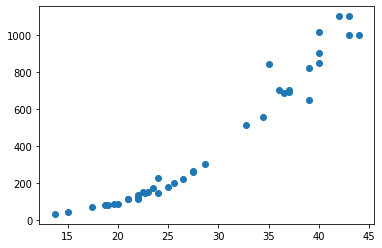

In [26]:
#훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

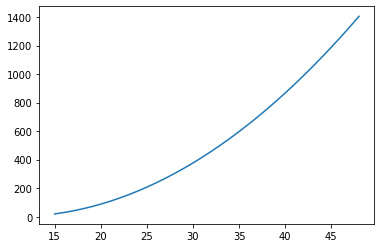

In [30]:
#15에서 49까지 이차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2-21.6*point+116.05)

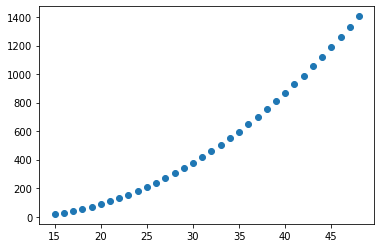

In [33]:
plt.scatter(point,1.01*point**2-21.6*point+116.05) #산점도로 확인해보면, 이런 모양이 나오게 된다.

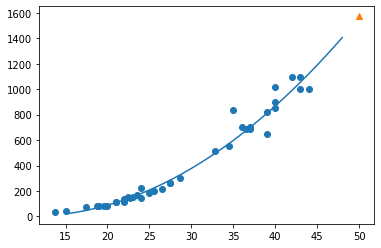

In [34]:
#위에서 하나하나 살펴본 데이터들을 합쳐서 한번에 보기!
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2-21.6*point+116.05)
plt.scatter(50, 1574, marker = '^')
plt.show()

- 앞의 단순 선형 회귀 모델보다 더 정확한 그래프가 그려졌다.
- 훈련 세트의 경향을 잘 따르고 있는 것 같다.
- R²점수를 살펴보자.

In [38]:
print('train score:' + str(lr.score(train_poly, train_target)))
print('test score:' + str(lr.score(test_poly, test_target)))

train score:0.9706807451768623
test score:0.9775935108325122


- 점수는 많이 올라왔지만, 아직 *과소적합*의 문제가 남아있어보인다.